In [1]:
import pandas as pd
import geopandas as gpd

In [8]:
import matplotlib.pyplot as plt

In [5]:
df_allpoi = pd.read_csv('dest_access_summary_allPOI_070519.csv')

In [61]:
df_all = pd.read_csv('dest_summary_output_030519.csv')

In [66]:
df_allpoi.columns

Index(['dest_busid', 'TripsPerDest', 'TripsPerOrig', 'poi_100',
       'access_score_100', 'access_score_200', 'access_score_300',
       'access_score_400', 'access_score_500', 'access_score_600'],
      dtype='object')

In [68]:
df_allpoi[['dest_busid', 'TripsPerDest', 'TripsPerOrig']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 3 columns):
dest_busid      4370 non-null int64
TripsPerDest    4370 non-null int64
TripsPerOrig    4370 non-null float64
dtypes: float64(1), int64(2)
memory usage: 102.5 KB


In [69]:
fp = 'trips.csv'
df_allpoi[['dest_busid', 'TripsPerDest', 'TripsPerOrig']].to_csv(fp, index=False)

In [10]:
df_allpoi.describe()

,dest_busid,TripsPerDest,TripsPerOrig,poi_100,access_score_100,access_score_200,access_score_300,access_score_400,access_score_500,access_score_600
count,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000
mean,3646.460412,84.859268,84.526316,0.110526,0.043126,0.074486,0.071182,0.056332,0.041984,0.031697
std,1580.434321,192.114524,239.416555,0.385006,0.143513,0.135231,0.107222,0.086493,0.068318,0.055794
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2348.250000,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002336
50%,3605.500000,36.000000,31.000000,0.000000,0.000000,0.000000,0.037279,0.028579,0.020329,0.014735
75%,4820.750000,94.000000,86.000000,0.000000,0.000000,0.132086,0.102503,0.072233,0.052712,0.038780
max,6997.000000,4270.000000,5302.000000,5.000000,0.950247,0.913354,0.913354,0.888308,0.818447,0.809354


[array([12.,  1.]), array([ 94., 217.])]

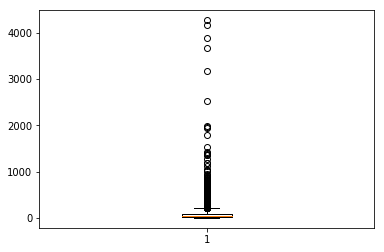

In [13]:
#identifying outliers in the trip data
boxplot_trips = plt.boxplot(df_allpoi['TripsPerDest'])
[item.get_ydata() for item in boxplot_trips['whiskers']]

In [16]:
q1q3 = [item.get_ydata()[0] for item in boxplot_trips['whiskers']]

In [17]:
iqr = q1q3[1] - q1q3[0]

In [22]:
left_outlier_bound = q1q3[0] - (1.5*iqr)
right_outlier_bound = q1q3[1] + (1.5*iqr)

In [23]:
print(left_outlier_bound, right_outlier_bound)

-111.0 217.0


In [35]:
iqr 

82.0

In [26]:
#what bus stops have total trips outside right_outlier_bound (362 in total)
outliers = df_allpoi[df_allpoi['TripsPerDest']>right_outlier_bound]

In [27]:
non_outliers = df_allpoi[df_allpoi['TripsPerDest']<=right_outlier_bound]

In [28]:
outliers.describe()

,dest_busid,TripsPerDest,TripsPerOrig,poi_100,access_score_100,access_score_200,access_score_300,access_score_400,access_score_500,access_score_600
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,3573.530387,477.505525,468.839779,0.149171,0.063975,0.116085,0.100335,0.073270,0.052057,0.039661
std,1561.415889,499.456221,695.381532,0.400639,0.172237,0.150486,0.098682,0.071782,0.053788,0.046312
min,1009.000000,218.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2393.750000,264.000000,180.250000,0.000000,0.000000,0.000000,0.039120,0.028147,0.019184,0.013503
50%,3694.500000,336.500000,288.000000,0.000000,0.000000,0.000000,0.074864,0.054352,0.039554,0.028458
75%,4646.000000,470.750000,460.750000,0.000000,0.000000,0.195840,0.143511,0.095754,0.067614,0.052475
max,6983.000000,4270.000000,5302.000000,2.000000,0.867381,0.867381,0.631329,0.533324,0.533324,0.533324


[array([264., 218.]), array([470.75, 765.  ])]

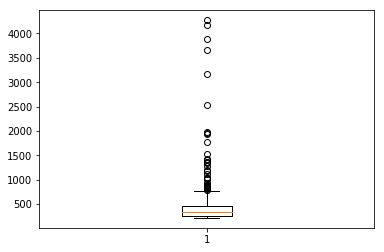

In [40]:
B = plt.boxplot(outliers['TripsPerDest'])
[item.get_ydata() for item in B['whiskers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1abda12f400>,
 'caps': [<matplotlib.lines.Line2D at 0x1abda12fa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abda12f048>],
 'medians': [<matplotlib.lines.Line2D at 0x1abda12fe48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abda139438>],
 'means': []}

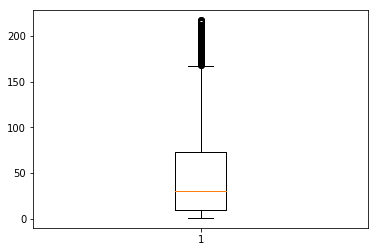

In [30]:
plt.boxplot(non_outliers['TripsPerDest'])

In [57]:
len(non_outliers[non_outliers['TripsPerDest']==3])

123

In [ ]:
outliers[outliers['TripsPerDest']>1000]

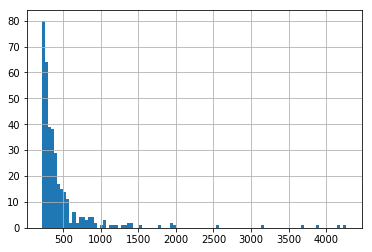

In [45]:
outliers['TripsPerDest'].hist(bins=100)

In [ ]:
non_outliers['TripsPerDest'].hist(figsize=(40,40),bins=200)

In [ ]:
outliers.corr()

In [51]:
outliers_trips = outliers[['dest_busid','TripsPerDest']].copy()

In [ ]:
outliers[outliers['TripsPerDest']>765]

In [ ]:
df_all[df_all['TripsPerDest']>765]

In [73]:
import geopandas as gpd

In [74]:
bus_stops = gpd.read_file('C:/Users/Grace/Documents/Singapore/BusStopLocation_Jan2019/BusStop.shp')

In [ ]:
bus_stops.head()

In [93]:
df_all.dest_busid = df_all.dest_busid.astype(str)

In [94]:
merge = pd.merge(bus_stops, df_all, how='inner',left_on='BUS_STOP_N', right_on='dest_busid')

In [95]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 19 columns):
BUS_STOP_N          0 non-null object
BUS_ROOF_N          0 non-null object
LOC_DESC            0 non-null object
geometry            0 non-null object
dest_busid          0 non-null object
TripsPerDest        0 non-null int64
TripsPerOrig        0 non-null float64
poi_100             0 non-null float64
access_score_100    0 non-null float64
poi_200             0 non-null float64
access_score_200    0 non-null float64
poi_300             0 non-null float64
access_score_300    0 non-null float64
poi_400             0 non-null float64
access_score_400    0 non-null float64
poi_500             0 non-null float64
access_score_500    0 non-null float64
poi_600             0 non-null float64
access_score_600    0 non-null float64
dtypes: float64(13), int64(1), object(5)
memory usage: 0.0+ bytes


In [15]:
import pandas as pd
trips = pd.read_csv('trips.csv')

In [16]:
import matplotlib.pyplot as plt

In [17]:
trips.head()

,dest_busid,TripsPerDest,TripsPerOrig
0,1001,172,107.0
1,1002,85,52.0
2,1003,127,101.0
3,1004,100,149.0
4,1005,154,165.0


In [18]:
trips.dest_busid = trips.dest_busid.astype(str)

In [19]:
trips.describe()

,TripsPerDest,TripsPerOrig
count,4370.000000,4370.000000
mean,84.859268,84.526316
std,192.114524,239.416555
min,1.000000,0.000000
25%,12.000000,9.000000
50%,36.000000,31.000000
75%,94.000000,86.000000
max,4270.000000,5302.000000


In [20]:
trips.var()

TripsPerDest    36907.990490
TripsPerOrig    57320.286902
dtype: float64

In [21]:
#plot bar graph to show the frequency of trips for each bus stop
#ax=trips.plot.bar(x='dest_busid', y='TripsPerDest', figsize=(20,10))
#ax.set_xlabel('Bus Stops')
#ax.set_ylabel('Exit Trip Frequency per Bustop')

In [23]:
interchange = pd.read_csv('interchanges_trips.csv')
interchange.dest_busid = interchange.dest_busid.astype(str)
inter_merge = pd.merge(trips, interchange, on='dest_busid', how='left')

In [33]:
inter_merge[inter_merge['dest_busid']=='2492']

,dest_busid,TripsPerDest,TripsPerOrig,Interchange_ZipCode,Elderly_Trips_Freq,Has_Interchange


In [25]:
inter_merge[inter_merge['Has_Interchange'] !=1].describe()

,TripsPerDest,TripsPerOrig,Interchange_ZipCode,Elderly_Trips_Freq,Has_Interchange
count,4350.000000,4350.000000,0.0,0.0,0.0
mean,78.725057,75.992414,NaN,NaN,NaN
std,140.588013,165.591941,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN
25%,12.000000,9.000000,NaN,NaN,NaN
50%,35.000000,30.000000,NaN,NaN,NaN
75%,93.000000,85.000000,NaN,NaN,NaN
max,3170.000000,4561.000000,NaN,NaN,NaN


In [26]:
inter_merge[inter_merge['Has_Interchange'] !=1].var()

TripsPerDest           19764.989462
TripsPerOrig           27420.690906
Interchange_ZipCode             NaN
Elderly_Trips_Freq              NaN
Has_Interchange                 NaN
dtype: float64

In [27]:
trips3 = inter_merge[inter_merge['Has_Interchange'] !=1].copy()

Text(0, 0.5, 'Frequency of count value')

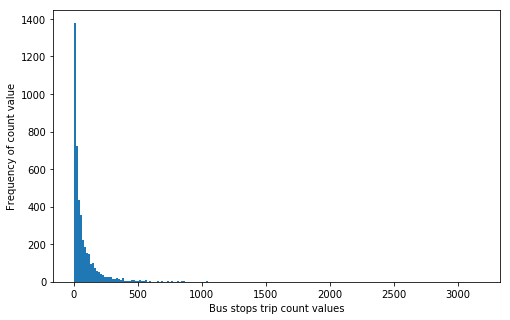

In [31]:
#plot histogram of the exit trips
ax = trips3['TripsPerDest'].plot.hist(bins = 200, figsize=(8,5))
ax.set_xlabel('Bus stops trip count values')
ax.set_ylabel('Frequency of count value')

In [30]:
len(trips[trips['TripsPerDest']>1000])

24

In [31]:
trips[trips['TripsPerDest']<1000].describe()

,TripsPerDest,TripsPerOrig
count,4346.000000,4346.000000
mean,74.576852,71.782329
std,108.641540,119.519935
min,1.000000,0.000000
25%,12.000000,9.000000
50%,35.000000,30.000000
75%,93.000000,85.000000
max,939.000000,1765.000000


In [32]:
trips[trips['TripsPerDest']<1000].var()

TripsPerDest    11802.984311
TripsPerOrig    14285.014979
dtype: float64

In [33]:
(24/4370)*100

0.5491990846681922

In [34]:
trips2 = trips[trips['TripsPerDest']<1000].copy()

Text(0, 0.5, 'Frequency of count value')

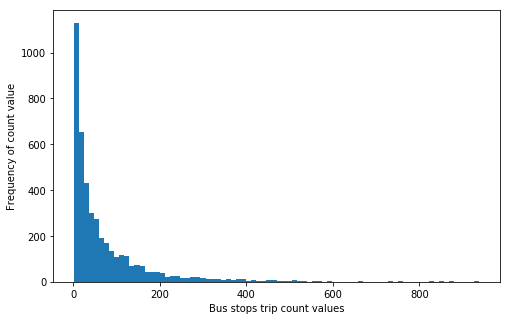

In [42]:
#plot histogram of the exit trips
ax = trips2['TripsPerDest'].plot.hist(bins = 80, figsize=(8,5))
ax.set_xlabel('Bus stops trip count values')
ax.set_ylabel('Frequency of count value')

In [47]:
#Analysing the POIs
poi = pd.read_csv("C:/Users/Grace/Documents/reconclusionofstudyvisitagreatexperienceatdplab/Python/OD_allPOI_600.csv")

In [50]:
poi.poi_group.unique()

array(['child_care', 'health_care', 'culture', 'daily_needs', 'sports',
       'social'], dtype=object)

In [51]:
child_care = poi[poi['poi_group']=='child_care']
health_care = poi[poi['poi_group']=='health_care']
culture = poi[poi['poi_group']=='culture']
shop = poi[poi['poi_group']=='daily_needs']
sports = poi[poi['poi_group']=='sports']
social = poi[poi['poi_group']=='social']

In [52]:
child_care.columns

Index(['Name', 'Total_Leng', 'geometry', 'dest_busid', 'poi', 'TRADE_CODE',
       'poi_group'],
      dtype='object')

In [55]:
print('child_care ', len(child_care.poi.unique()))
print('health_care ', len(health_care.poi.unique()))
print('culture ', len(culture.poi.unique()))
print('shop ', len(shop.poi.unique()))
print('social ', len(social.poi.unique()))
print('sports ', len(sports.poi.unique()))

child_care  420
health_care  283
culture  850
shop  260
social  176
sports  194


In [ ]:
#assign location to high trip bus stops
dest_summary = pd.read_csv('high_trips_bus.csv')

In [24]:
loc = gpd.read_file('C:/Users/Grace/Documents/Singapore shapefiles/analysis_12_06_19/BusStops_location.shp')
loc.dest_busid = loc.dest_busid.astype(str)

In [28]:
trips_loc = loc.merge(dest_summary, how='right', on='dest_busid')

In [ ]:
#check if the non located bus_stops are same wit those without pois within 600m
trips_loc


In [33]:
trips_loc.x, trips_loc.y = trips_loc.x.astype(str),trips_loc.x.astype(str)

In [45]:
#encoding the interchange addresses for it to be recognized in GIS
interchange = pd.read_csv('C:/Users/Grace/Documents/reconclusionofstudyvisitagreatexperienceatdplab/Interchange_Addresses3.csv', encoding = "ISO-8859-1")

In [47]:
interchange.to_csv('Interchange_Addresses4.csv', index=False, encoding="utf-8")

In [39]:
trips_loc.to_csv('high_trips_loc.csv')